In [1]:
from cp_dataset import CPDataset
from train_condition import get_opt

import os
from PIL import Image

In [2]:
opt = get_opt()

In [3]:
opt.fine_width

192

In [4]:
train_dataset = CPDataset(opt)

FileNotFoundError: [Errno 2] No such file or directory: './data/train_pairs.txt'

In [5]:
# 임의의 인물과 옷 사진 조합

im_names = []
c_names = []
with open('/home/aiteam/tykim/generative_model/human/HR-VITON/train_pairs.txt', 'r') as f:
    for line in f.readlines():
        im_name, c_name = line.strip().split()
        im_names.append(im_name)
        c_names.append(c_name)

In [6]:
im_names[:10], c_names[:10]

(['10224_00.jpg',
  '12308_00.jpg',
  '08020_00.jpg',
  '11066_00.jpg',
  '05020_00.jpg',
  '10814_00.jpg',
  '08994_00.jpg',
  '07690_00.jpg',
  '01492_00.jpg',
  '03456_00.jpg'],
 ['03195_00.jpg',
  '07502_00.jpg',
  '01091_00.jpg',
  '13399_00.jpg',
  '01444_00.jpg',
  '11910_00.jpg',
  '02899_00.jpg',
  '13449_00.jpg',
  '00171_00.jpg',
  '00744_00.jpg'])

In [10]:
index = 0


im_name = im_names[index]
im_name = 'image/' + im_name

In [11]:
im_name

'image/10224_00.jpg'

In [7]:
import torch
import torchvision.transforms as transforms
import numpy as np

In [8]:
parse_name = 'image-parse-v3/00000_00.png'

In [9]:
im_parse_pil_big = Image.open(os.path.join('./data', parse_name))
im_parse_pil = transforms.Resize([opt.fine_width],  interpolation=0)(im_parse_pil_big)

/home/aiteam/miniconda3/envs/3dfm/lib/python3.8/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


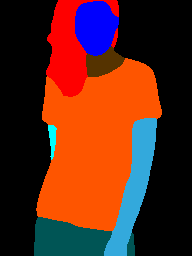

In [10]:
im_parse_pil

In [17]:
# [1, 256, 192]
parse = torch.from_numpy(np.array(im_parse_pil)[None]).long()

In [18]:
parse.shape

torch.Size([1, 256, 192])

In [11]:
trsf = transforms.Compose([  \
                transforms.ToTensor(),   \
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [12]:
im_parse = trsf(im_parse_pil.convert('RGB'))

In [13]:
labels = {
            0:  ['background',  [0, 10]],
            1:  ['hair',        [1, 2]],
            2:  ['face',        [4, 13]],
            3:  ['upper',       [5, 6, 7]],
            4:  ['bottom',      [9, 12]],
            5:  ['left_arm',    [14]],
            6:  ['right_arm',   [15]],
            7:  ['left_leg',    [16]],
            8:  ['right_leg',   [17]],
            9:  ['left_shoe',   [18]],
            10: ['right_shoe',  [19]],
            11: ['socks',       [8]],
            12: ['noise',       [3, 11]]
        }

In [15]:
parse_map = torch.FloatTensor(20, opt.fine_height, opt.fine_width).zero_()

In [19]:
# parse 값이 있는 위치에 1을 넣어줌
# 채널 방향으로 0~20에 있는 값의 위치에 대해 1을 넣어줌
parse_map = parse_map.scatter_(0, parse, 1.0)

In [27]:
import lovely_tensors as lt
lt.monkey_patch()

In [26]:
torch.unique(parse_map)

tensor([0., 1.])

In [33]:
torch.unique(parse)

tensor[8] i64 x∈[0, 15] μ=8.500 σ=5.632 [0, 2, 5, 9, 10, 13, 14, 15]

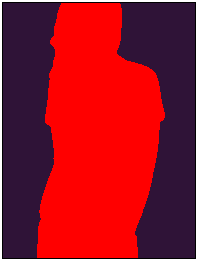

In [32]:
lt.chans(parse)

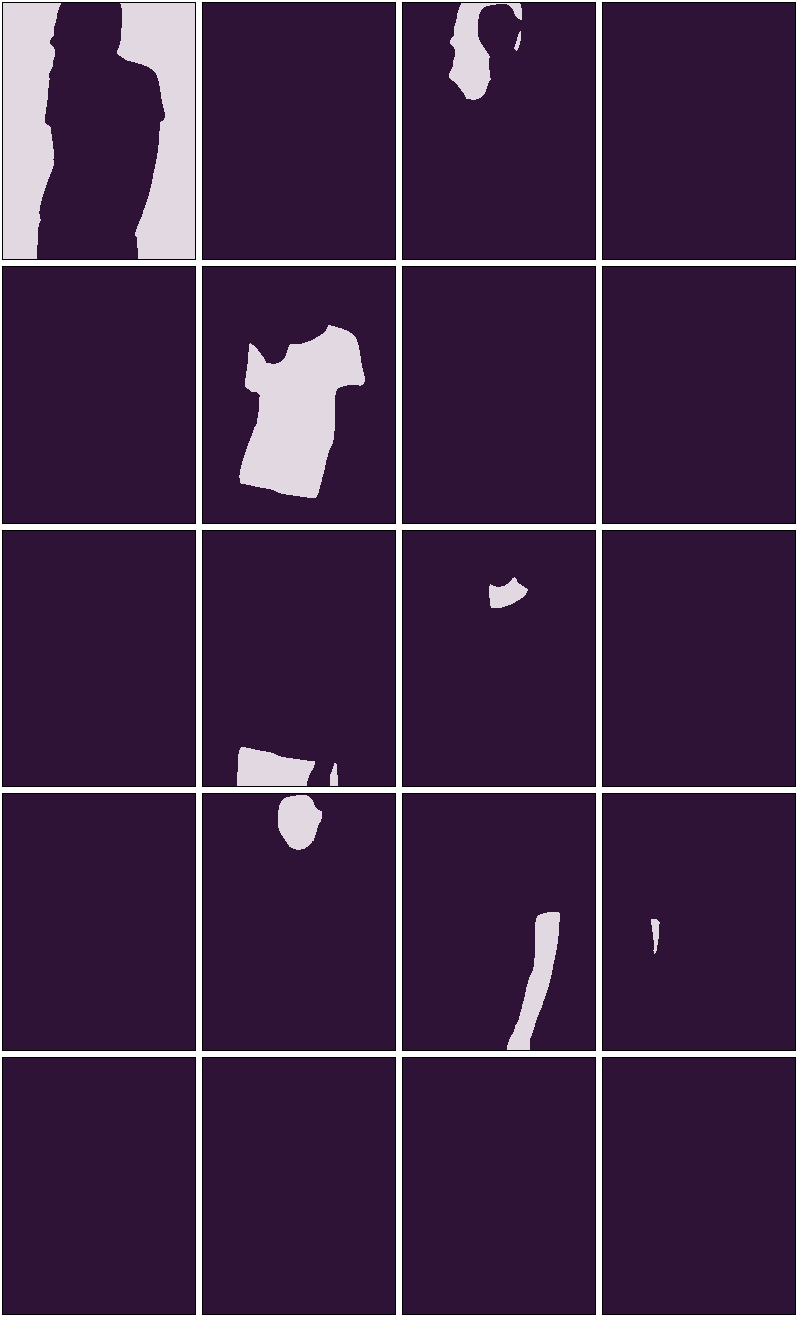

In [31]:
lt.chans(parse_map)

In [34]:
new_parse_map = torch.FloatTensor(opt.semantic_nc, opt.fine_height, opt.fine_width).zero_()

In [35]:
for i in range(len(labels)):
    for label in labels[i][1]:
        print(label)
        # new_parse_map[i] += parse_map[label]

0
10
1
2
4
13
5
6
7
9
12
14
15
16
17
18
19
8
3
11
